In [3]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, auc, average_precision_score,
                             classification_report, confusion_matrix, 
                             precision_recall_curve, precision_score, 
                             recall_score, roc_curve)
import kds
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-11-11 13:02:19.060384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Animal vs No Animal

In [4]:
test = pd.read_pickle('ArchivosUtiles/testingAnimal.pkl')

In [5]:
X_test = test['Imagen']
y_test = test['Animal']

In [6]:
X_test_tf = tf.convert_to_tensor(np.array([img_to_array(img) for img in X_test]))

In [7]:
modelVGG16 = load_model('ModelosFinales/modeloAnimalVGG16.h5')
modelIV3 = load_model('ModelosFinales/modeloAnimalIV3.h5')
modelRN50 = load_model('ModelosFinales/modeloAnimalRN50.h5')

## Model VGG16

In [8]:
y_probaVGG16 = modelVGG16.predict(X_test_tf)
y_predVGG16 = (y_probaVGG16 >= 0.5).astype(int)

38/38 [==============================] - 69s 2s/step


In [9]:
# Calculamos Accuracy
accuracyVGG16 = accuracy_score(y_test, y_predVGG16)
print(f"Accuracy: {accuracyVGG16}")

# Calculamos Recall
recallVGG16 = recall_score(y_test,  y_predVGG16, pos_label=1, average='binary')
print(f"Recall: {recallVGG16}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predVGG16).ravel()
specificityVGG16 = tn / (tn + fp)
print(f"Specificity: {specificityVGG16}")
# 0.9753086419753086

Accuracy: 0.9654591406908172
Recall: 0.967741935483871
Specificity: 0.9629629629629629


In [10]:
# Calcular average precision
apVGG16 = average_precision_score(y_test, y_probaVGG16)

print("Average Precision (AP):", apVGG16)

Average Precision (AP): 0.9835940006174747


In [11]:
print(classification_report(y_test, y_predVGG16))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       567
           1       0.97      0.97      0.97       620

    accuracy                           0.97      1187
   macro avg       0.97      0.97      0.97      1187
weighted avg       0.97      0.97      0.97      1187



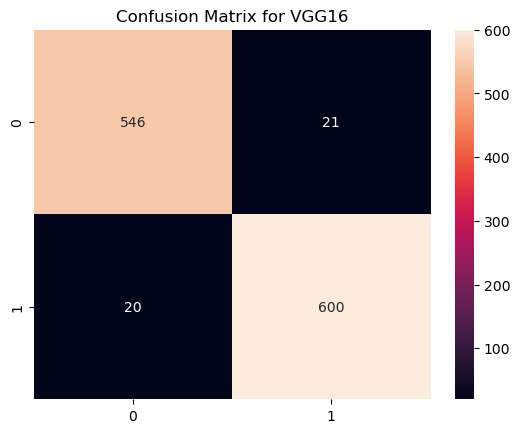

In [12]:
confusion_vgg16 = confusion_matrix(y_test, y_predVGG16)
sns.heatmap(confusion_vgg16, annot=True, fmt='g')  
plt.title('Confusion Matrix for VGG16')
plt.show()

## Model Inception V3

In [13]:
y_probaIV3 = modelIV3.predict(X_test_tf)
y_predIV3 = (y_probaIV3 >= 0.5).astype(int)

38/38 [==============================] - 12s 295ms/step


In [14]:
# Calculamos Accuracy
accuracyIV3 = accuracy_score(y_test, y_predIV3)
print(f"Accuracy: {accuracyIV3}")

# Calculamos Recall
recallIV3 = recall_score(y_test, y_predIV3, pos_label=1, average='binary')
print(f"Recall: {recallIV3}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predIV3).ravel()
specificityIV3 = tn / (tn + fp)
print(f"Specificity: {specificityIV3}")

Accuracy: 0.9604043807919124
Recall: 0.9854838709677419
Specificity: 0.9329805996472663


In [15]:
# Calcular average precision
apIV3 = average_precision_score(y_test, y_probaIV3)

print("Average Precision (AP):", apIV3)

Average Precision (AP): 0.966844633225649


In [16]:
print(classification_report(y_test, y_predIV3))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       567
           1       0.94      0.99      0.96       620

    accuracy                           0.96      1187
   macro avg       0.96      0.96      0.96      1187
weighted avg       0.96      0.96      0.96      1187



## Model ResNet 50

In [17]:
y_probaRN50 = modelRN50.predict(X_test_tf)
y_predRN50 = (y_probaRN50 >= 0.01).astype(int)

38/38 [==============================] - 24s 618ms/step


In [18]:
# Calculamos Accuracy
accuracyRN50 = accuracy_score(y_test, y_predRN50)
print(f"Accuracy: {accuracyRN50}")

# Calculamos Recall
recallRN50 = recall_score(y_test, y_predRN50, pos_label=1, average='binary')
print(f"Recall: {recallRN50}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predRN50).ravel()
specificityRN50 = tn / (tn + fp)
print(f"Specificity: {specificityRN50}")

Accuracy: 0.966301600673968
Recall: 0.9887096774193549
Specificity: 0.9417989417989417


In [19]:
# Calcular average precision
apRN50 = average_precision_score(y_test, y_probaRN50)

print("Average Precision (AP):", apRN50)

Average Precision (AP): 0.9829587558124374


In [20]:
print(classification_report(y_test, y_predRN50))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       567
           1       0.95      0.99      0.97       620

    accuracy                           0.97      1187
   macro avg       0.97      0.97      0.97      1187
weighted avg       0.97      0.97      0.97      1187



## Graficos

In [21]:
colores = [ '#2B3B52', '#355028', '#907766', '#25401B', '#FDFBF8']

In [22]:
# Suponiendo que tienes listas con precision, recall, F1 para cada modelo
accuracys = [accuracyVGG16, accuracyIV3, accuracyRN50]
recalls = [recallVGG16, recallIV3, recallRN50]
specificitys = [specificityVGG16, specificityIV3, specificityRN50]
aps = [apVGG16, apIV3, apRN50]

labels = ['VGG16', 'InceptionV3', 'ResNet50']

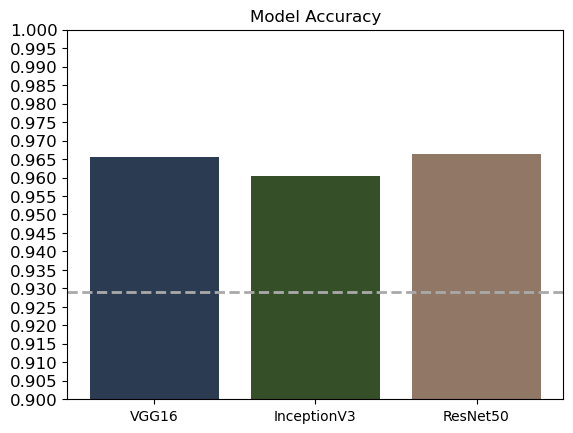

In [23]:
plt.bar(labels, accuracys, color=colores[0:3])
plt.axhline(y=0.929, color='darkgrey', linestyle='dashed', linewidth=2)
plt.ylim([0.90, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.90, 1, 21), fontsize=12) 
plt.title('Model Accuracy')
plt.show()

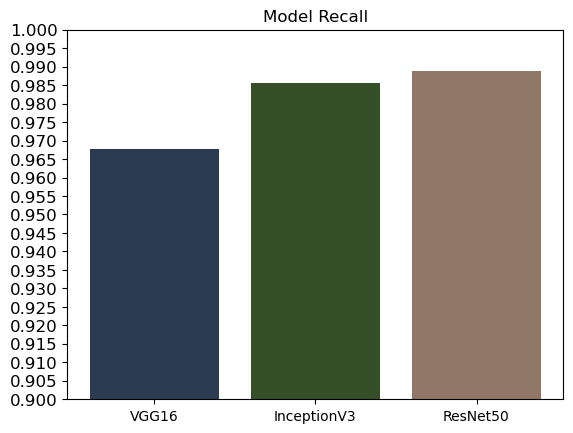

In [24]:
plt.bar(labels, recalls, color=colores[0:3])
plt.title('Model Recall')
plt.ylim([0.90, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.90, 1, 21), fontsize=12) 
plt.show()

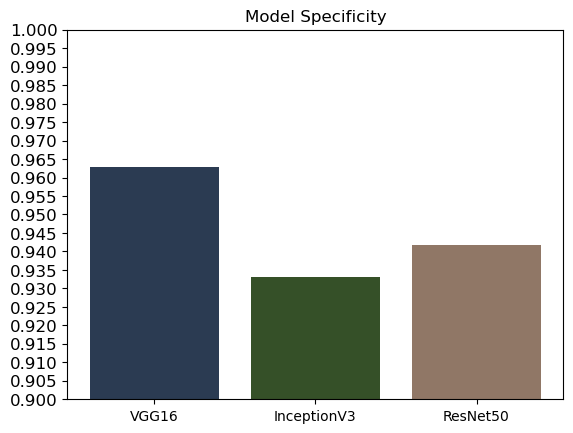

In [25]:
plt.bar(labels, specificitys, color=colores[0:3])
plt.title('Model Specificity')
plt.ylim([0.90, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.90, 1, 21), fontsize=12) 
plt.show()

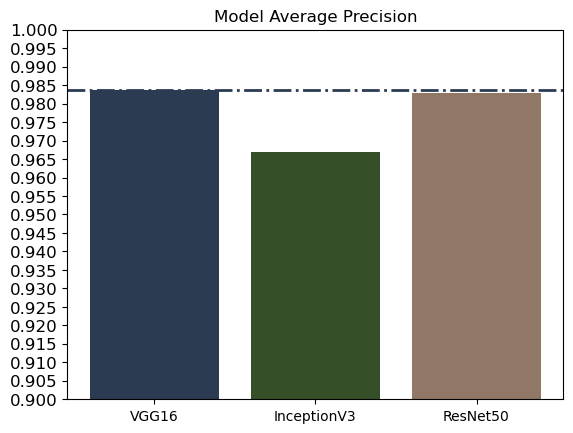

In [26]:
plt.bar(labels, aps, color=colores[0:3])
plt.title('Model Average Precision')
plt.axhline(y=max(aps), color=colores[0], linestyle='-.', linewidth=2)
plt.ylim([0.90, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.90, 1, 21), fontsize=12) 
plt.show()

In [27]:
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_test, y_predVGG16)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

fpr_IV3, tpr_IV3, _ = roc_curve(y_test, y_predIV3)
roc_auc_IV3 = auc(fpr_IV3, tpr_IV3)

fpr_RN50, tpr_RN50, _ = roc_curve(y_test, y_predRN50)
roc_auc_RN50 = auc(fpr_RN50, tpr_RN50)

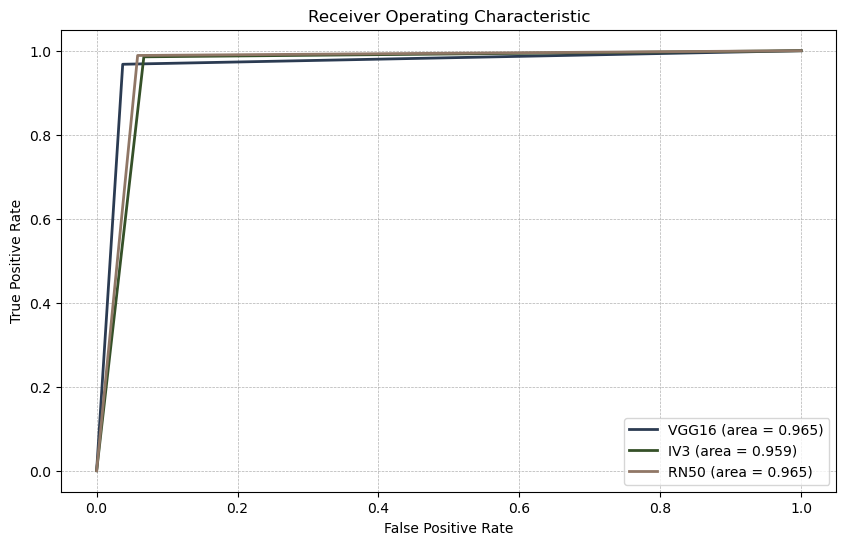

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_vgg16, tpr_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % roc_auc_vgg16, linewidth=2)
plt.plot(fpr_IV3, tpr_IV3, color=colores[1], label='IV3 (area = %0.3f)' % roc_auc_IV3, linewidth=2)
plt.plot(fpr_RN50, tpr_RN50, color=colores[2], label='RN50 (area = %0.3f)' % roc_auc_RN50, linewidth=2)  # Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')  # Etiqueta para el eje x
plt.ylabel('True Positive Rate')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [29]:
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_test, y_predVGG16)
pr_auc_vgg16 = auc(recall_vgg16, precision_vgg16)

precision_IV3, recall_IV3, _ = precision_recall_curve(y_test, y_predIV3)
pr_auc_IV3 = auc(recall_IV3, precision_IV3)

precision_RN50, recall_RN50, _ = precision_recall_curve(y_test, y_predRN50)
pr_auc_RN50 = auc(recall_RN50, precision_RN50)

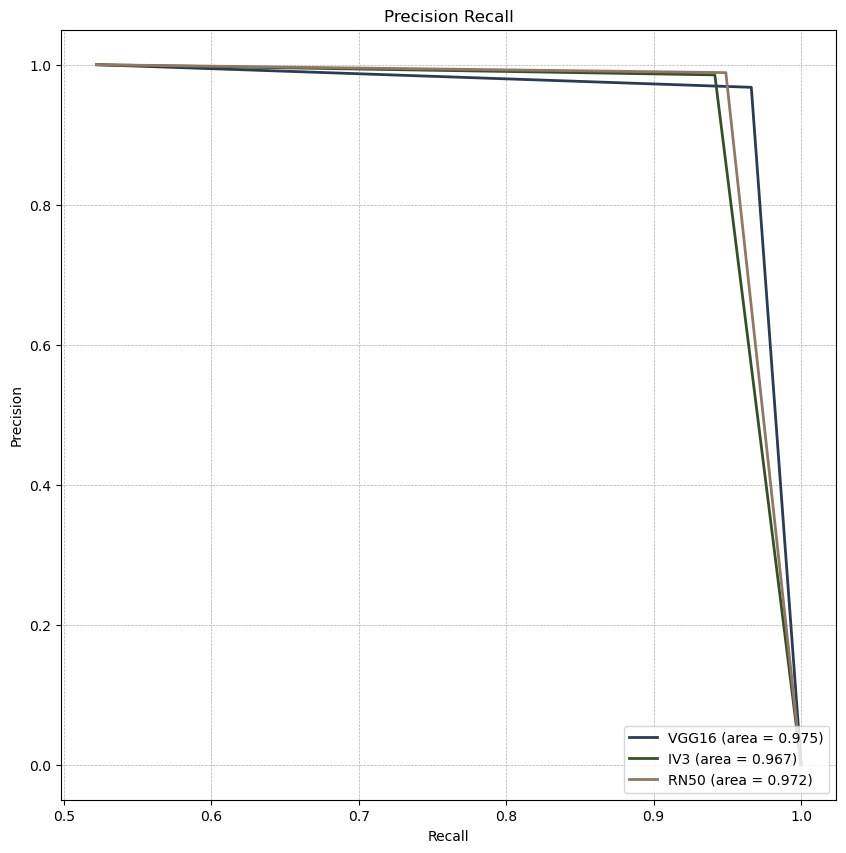

In [30]:
plt.figure(figsize=(10, 10))
plt.plot(precision_vgg16, recall_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % pr_auc_vgg16, linewidth=2)
plt.plot(precision_IV3, recall_IV3, color=colores[1], label='IV3 (area = %0.3f)' % pr_auc_IV3, linewidth=2)
plt.plot(precision_RN50, recall_RN50, color=colores[2], label='RN50 (area = %0.3f)' % pr_auc_RN50, linewidth=2)# Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Precision Recall')
plt.xlabel('Recall')  # Etiqueta para el eje x
plt.ylabel('Precision')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [38]:
#  Funcion que busca optimizar el costo para identificar los umbrales de validacion.
def optimizar_umbral(y_test, y_proba, tarea, CFP = 1000, CFN = 300, CV = 20, TV = 0.579):
    #  Inicializacion de variables
    limInf = 0
    limSup = 1
    CostoMin = float('inf')
    V = 0
    # Determinacion de costos.
    if tarea == 'especie':
        CE = CFP + CFN
    else:
        CE = (CFP + CFN) / 2
    # Ciclo que minimizando el costo.
    # Balancea el costo generado por errores de clasificacion con el costo de validacion.
    for umbral_inf in np.arange(0.01, 0.5, 0.01):
        for umbral_sup in np.arange(0.5, 0.99, 0.01):
            # Determina la cantidad de imagenes que caen entre los umbrales.
            V = np.sum((y_proba >= umbral_inf) & (y_proba <= umbral_sup))
            #  Costo generado por la validacion.
            C = V * CV 
            #  Costo de Error de Validacion
            C += V * TV * CE
            #  Determina el error que conlleva no validar fuera de los umbrales.
            if tarea == 'presencia':
                #  Errores por Falsos Positivos fuera de los umbrales.
                FP = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 0))
                #  Errores por Falsos Negativos fuera de los umbrales.
                FN = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 1))
                #  Costos generados por errores de clasificacion.
                C += FP * CFP + FN * CFN
            else:
                # Errores generados.
                E = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup))
                # Costo generado por errores de clasificacion.
                C += E * CE
            # En el caso de que el costo sea menor al minimo actual, se actualiza el minimo.
            if C < CostoMin:
                CostoMin = C
                limInf = umbral_inf
                limSup = umbral_sup
    
    print(f"Mejor rango de umbral: {round(limInf,2)} - {round(limSup,2)} con un costo de: ${CostoMin}")
    print(f"Validara {V} imagenes, correspondientes al {round(V * 100 / len(y_test),2)}% del total de las imagenes.")
 
    return limInf, limSup

In [39]:
umbral_inf_optimo, umbral_sup_optimo = optimizar_umbral(y_test, y_probaVGG16.ravel(),'presencia')

Mejor rango de umbral: 0.01 - 0.96 con un costo de: $922332.1
Validara 41 imagenes, correspondientes al 3.45% del total de las imagenes.


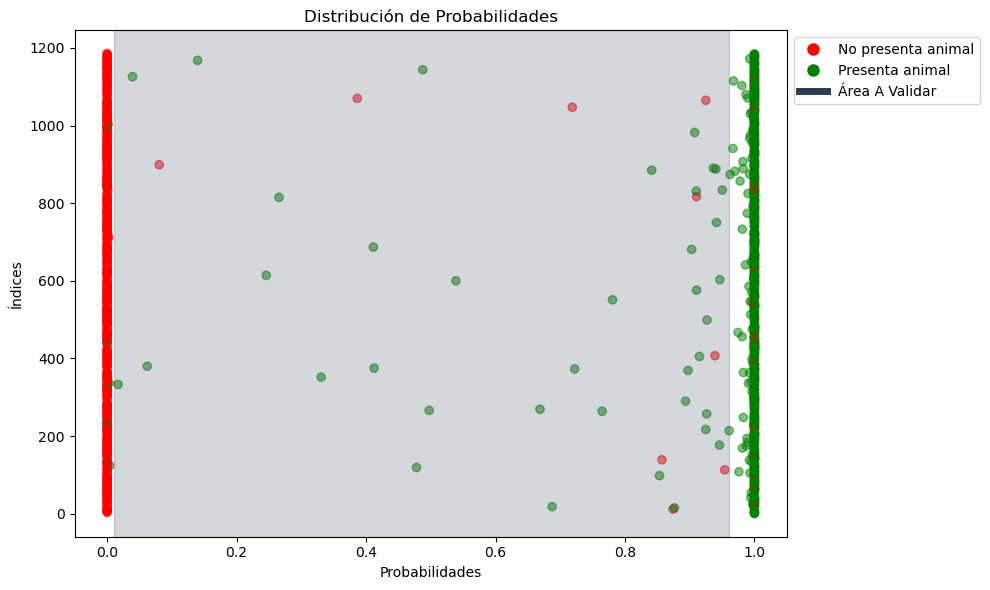

In [41]:
import matplotlib.pyplot as plt

# Crear índices para el eje x
x_values = list(range(len(y_probaVGG16)))

# Crear colores basados en y_test
color = ['red' if etiqueta == 0 else 'green' for etiqueta in y_test]

plt.figure(figsize=(10,6))
plt.scatter(y_probaVGG16, x_values, color=color, alpha=0.5)

# Sombrear el área 'A Validar'
plt.axvspan(umbral_inf_optimo, umbral_sup_optimo, alpha=0.2, color=colores[0], label='Área A Validar')

plt.title('Distribución de Probabilidades')
plt.xlabel('Probabilidades')
plt.ylabel('Índices')

# Añadir leyenda fuera del gráfico
from matplotlib.lines import Line2D
leyenda_elems = [Line2D([0], [0], marker='o', color='w', label='No presenta animal', markersize=10, markerfacecolor='red'),
                 Line2D([0], [0], marker='o', color='w', label='Presenta animal', markersize=10, markerfacecolor='green'),
                Line2D([0], [0], marker='None', color=colores[0], label='Área A Validar', linewidth=5)]
plt.legend(handles=leyenda_elems, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

##### Tecnica de Lift: 
Se calcula como el cociente entre la proporción de positivos acumulados y la proporción de totales acumulados. Equivalente a comparar los positivos destacados por el modelo vs lo que cabria esperar si nos guiamos por el azar. 

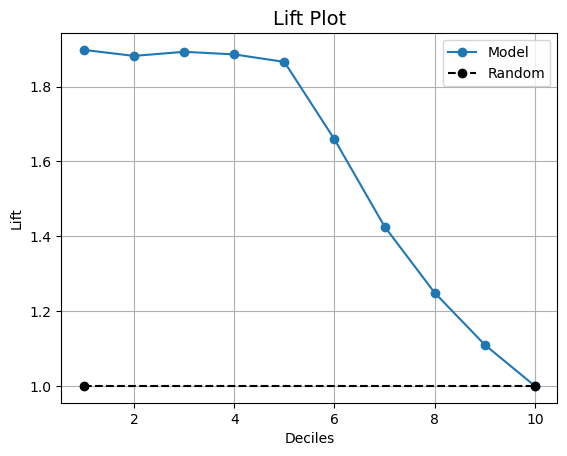

In [42]:
# Plot
kds.metrics.plot_lift(y_test, y_probaVGG16)

Interpretacion: cuantas veces le gana a la aleatoriedad en cada decil

# Guanaco vs No Guanaco

In [43]:
test = pd.read_pickle('ArchivosUtiles/testingGuanaco.pkl')

In [44]:
X_test = test['Imagen']
y_test = test['Guanaco']

In [45]:
X_test_tf = tf.convert_to_tensor(np.array([img_to_array(img) for img in X_test]))

In [46]:
modelVGG16 = load_model('ModelosFinales/modeloGuanacoVGG16.h5')
modelIV3 = load_model('ModelosFinales/modeloGuanacoIV3.h5')
modelRN50 = load_model('ModelosFinales/modeloGuanacoRN50.h5')

## Model VGG16

In [47]:
y_probaVGG16.shape

(1187, 1)

In [48]:
y_probaVGG16 = modelVGG16.predict(X_test_tf)
y_predVGG16 = (y_probaVGG16 >= 0.5).astype(int)

14/14 [==============================] - 29s 2s/step


In [49]:
# Calculamos Accuracy
accuracyVGG16 = accuracy_score(y_test, y_predVGG16)
print(f"Accuracy: {accuracyVGG16}")

# Calculamos Recall
recallVGG16 = recall_score(y_test,  y_predVGG16, pos_label=1, average='binary')
print(f"Recall: {recallVGG16}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predVGG16).ravel()
specificityVGG16 = tn / (tn + fp)
print(f"Specificity: {specificityVGG16}")


Accuracy: 0.8706697459584296
Recall: 0.9026845637583892
Specificity: 0.8


In [67]:
# Calcular average precision
apVGG16 = average_precision_score(y_test, y_probaVGG16)

print("Average Precision (AP):", apVGG16)

Average Precision (AP): 0.9749242071977317


In [68]:
print(classification_report(y_test, y_predVGG16))

              precision    recall  f1-score   support

       False       0.79      0.80      0.79       135
        True       0.91      0.90      0.91       298

    accuracy                           0.87       433
   macro avg       0.85      0.85      0.85       433
weighted avg       0.87      0.87      0.87       433



## Model Inception V3

In [69]:
y_probaIV3 = modelIV3.predict(X_test_tf)
y_predIV3 = (y_probaIV3 >= 0.5).astype(int)

14/14 [==============================] - 31s 2s/step


In [70]:
# Calculamos Accuracy
accuracyIV3 = accuracy_score(y_test, y_predIV3)
print(f"Accuracy: {accuracyIV3}")

# Calculamos Recall
recallIV3 = recall_score(y_test, y_predIV3, pos_label=1, average='binary')
print(f"Recall: {recallIV3}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predIV3).ravel()
specificityIV3 = tn / (tn + fp)
print(f"Specificity: {specificityIV3}")

Accuracy: 0.74364896073903
Recall: 0.9932885906040269
Specificity: 0.1925925925925926


In [71]:
# Calcular average precision
apIV3 = average_precision_score(y_test, y_probaIV3)

print("Average Precision (AP):", apIV3)

Average Precision (AP): 0.8090141185052003


In [72]:
print(classification_report(y_test, y_predIV3))

              precision    recall  f1-score   support

       False       0.93      0.19      0.32       135
        True       0.73      0.99      0.84       298

    accuracy                           0.74       433
   macro avg       0.83      0.59      0.58       433
weighted avg       0.79      0.74      0.68       433



## Model ResNet 50

In [73]:
y_probaRN50 = modelRN50.predict(X_test_tf)
y_predRN50 = (y_probaRN50 >= 0.5).astype(int)

14/14 [==============================] - 50s 3s/step


In [74]:
# Calculamos Accuracy
accuracyRN50 = accuracy_score(y_test, y_predRN50)
print(f"Accuracy: {accuracyRN50}")

# Calculamos Recall
recallRN50 = recall_score(y_test, y_predRN50, pos_label=1, average='binary')
print(f"Recall: {recallRN50}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predRN50).ravel()
specificityRN50 = tn / (tn + fp)
print(f"Specificity: {specificityRN50}")

Accuracy: 0.8637413394919169
Recall: 0.8624161073825504
Specificity: 0.8666666666666667


In [75]:
# Calcular average precision
apRN50 = average_precision_score(y_test, y_probaRN50)

print("Average Precision (AP):", apRN50)

Average Precision (AP): 0.9408560319539679


In [76]:
print(classification_report(y_test, y_predRN50))

              precision    recall  f1-score   support

       False       0.74      0.87      0.80       135
        True       0.93      0.86      0.90       298

    accuracy                           0.86       433
   macro avg       0.84      0.86      0.85       433
weighted avg       0.87      0.86      0.87       433



## Graficos

In [77]:
colores = [ '#2B3B52', '#355028', '#907766', '#25401B', '#FDFBF8']

In [78]:
# Suponiendo que tienes listas con precision, recall, F1 para cada modelo
accuracys = [accuracyVGG16, accuracyIV3, accuracyRN50]
recalls = [recallVGG16, recallIV3, recallRN50]
specificitys = [specificityVGG16, specificityIV3, specificityRN50]
aps = [apVGG16, apIV3, apRN50]

labels = ['VGG16', 'InceptionV3', 'ResNet50']

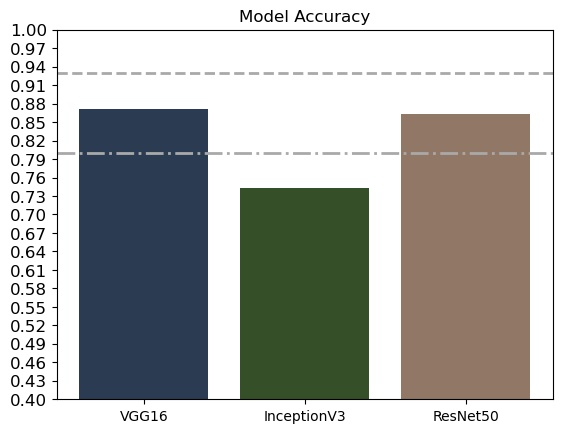

In [79]:
plt.bar(labels, accuracys, color=colores[0:3])
plt.axhline(y=0.929, color='darkgrey', linestyle='dashed', linewidth=2)
plt.axhline(y=0.8, color='darkgrey', linestyle='-.', linewidth=2)
plt.ylim([0.40, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.40, 1, 21), fontsize=12) 
plt.title('Model Accuracy')
plt.show()

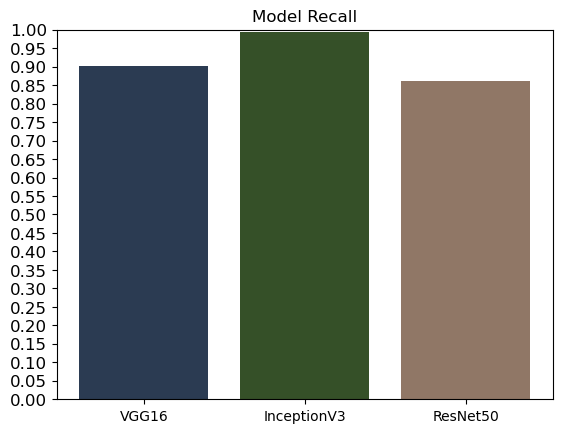

In [80]:
plt.bar(labels, recalls, color=colores[0:3])
plt.title('Model Recall')
plt.ylim([0, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0, 1, 21), fontsize=12) 
plt.show()

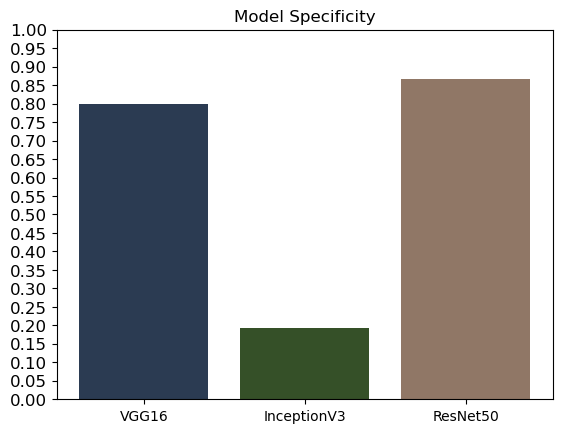

In [81]:
plt.bar(labels, specificitys, color=colores[0:3])
plt.title('Model Specificity')
plt.ylim([0, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0, 1, 21), fontsize=12) 
plt.show()

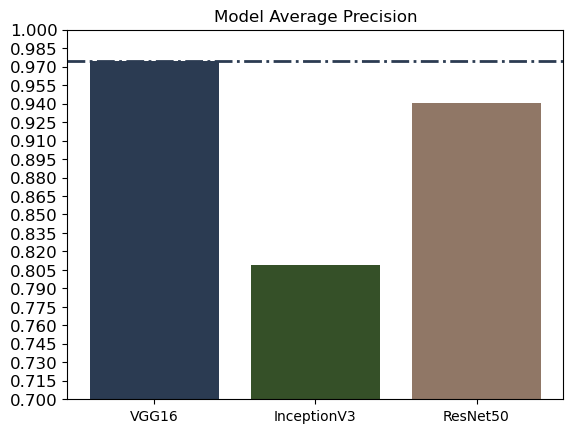

In [82]:
plt.bar(labels, aps, color=colores[0:3])
plt.title('Model Average Precision')
plt.axhline(y=max(aps), color=colores[0], linestyle='-.', linewidth=2)
plt.ylim([0.7, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.7, 1, 21), fontsize=12) 
plt.show()

In [83]:
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_test, y_predVGG16)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

fpr_IV3, tpr_IV3, _ = roc_curve(y_test, y_predIV3)
roc_auc_IV3 = auc(fpr_IV3, tpr_IV3)

fpr_RN50, tpr_RN50, _ = roc_curve(y_test, y_predRN50)
roc_auc_RN50 = auc(fpr_RN50, tpr_RN50)

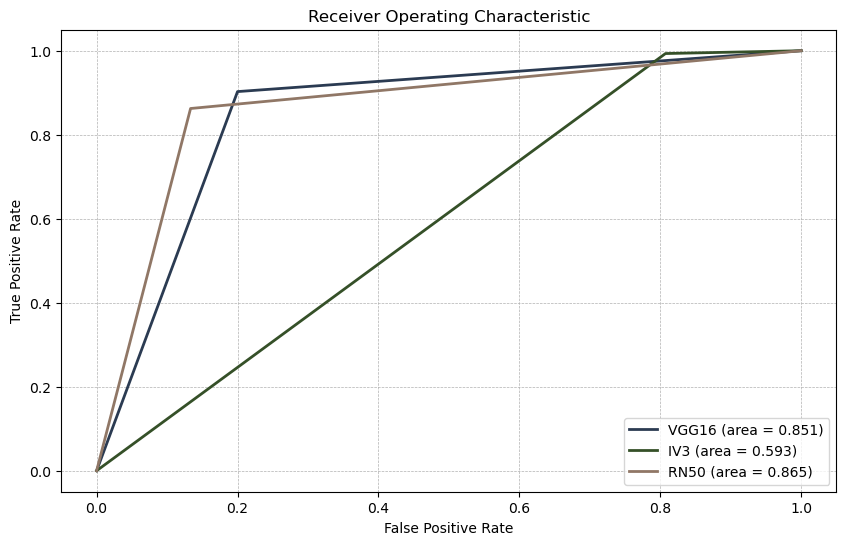

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_vgg16, tpr_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % roc_auc_vgg16, linewidth=2)
plt.plot(fpr_IV3, tpr_IV3, color=colores[1], label='IV3 (area = %0.3f)' % roc_auc_IV3, linewidth=2)
plt.plot(fpr_RN50, tpr_RN50, color=colores[2], label='RN50 (area = %0.3f)' % roc_auc_RN50, linewidth=2)  # Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')  # Etiqueta para el eje x
plt.ylabel('True Positive Rate')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [85]:
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_test, y_predVGG16)
pr_auc_vgg16 = auc(recall_vgg16, precision_vgg16)

precision_IV3, recall_IV3, _ = precision_recall_curve(y_test, y_predIV3)
pr_auc_IV3 = auc(recall_IV3, precision_IV3)

precision_RN50, recall_RN50, _ = precision_recall_curve(y_test, y_predRN50)
pr_auc_RN50 = auc(recall_RN50, precision_RN50)

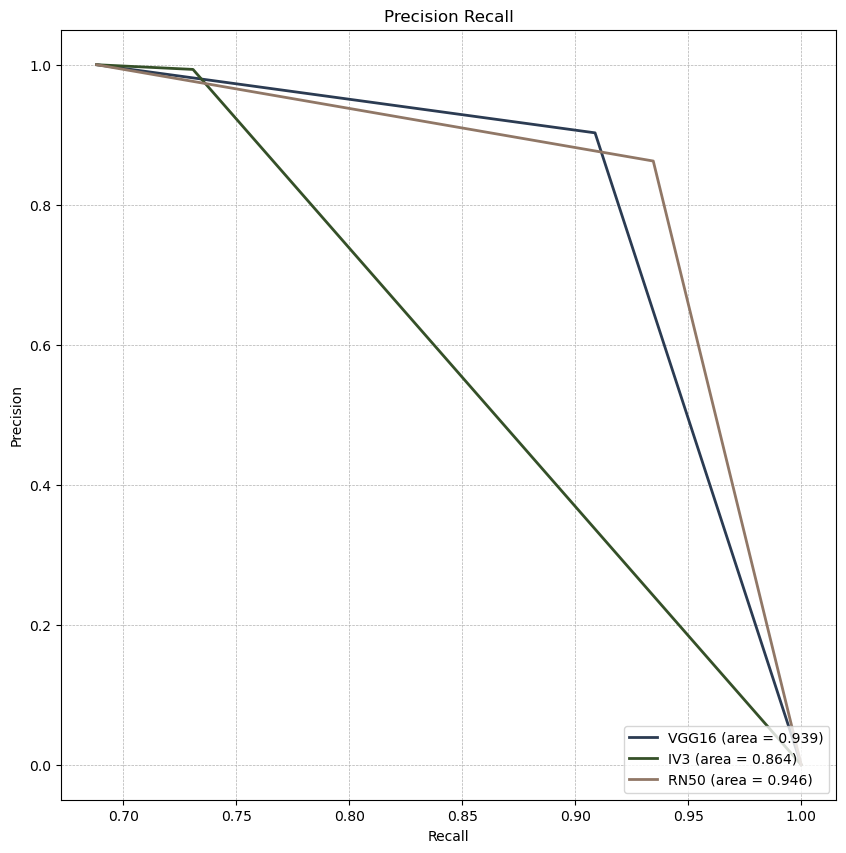

In [86]:
plt.figure(figsize=(10, 10))
plt.plot(precision_vgg16, recall_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % pr_auc_vgg16, linewidth=2)
plt.plot(precision_IV3, recall_IV3, color=colores[1], label='IV3 (area = %0.3f)' % pr_auc_IV3, linewidth=2)
plt.plot(precision_RN50, recall_RN50, color=colores[2], label='RN50 (area = %0.3f)' % pr_auc_RN50, linewidth=2)# Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Precision Recall')
plt.xlabel('Recall')  # Etiqueta para el eje x
plt.ylabel('Precision')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [87]:
def calcular_costo(y_true, y_proba, umbral_inf, umbral_sup, Ce, Cv):
    # Determina cuántas imágenes caen entre los umbrales y deben ser validadas manualmente
    imagenes_a_validar = np.logical_and(y_proba >= umbral_inf, y_proba <= umbral_sup)
    V = np.sum(imagenes_a_validar)
    
    # Calculo el error que conlleva no validar fuera del umbral
    imagenes_no_validadas = np.logical_or(y_proba < umbral_inf, y_proba > umbral_sup)
    errores = np.logical_and(imagenes_no_validadas, y_true != (y_proba > 0.5).astype(int))
    E = np.sum(errores)
    
    return Ce * E + Cv * V, V, V * 100 / len(y_true)

In [88]:
def optimizar_umbral(y_true, y_proba, Ce, Cv):
    mejor_umbral_inf = 0
    mejor_umbral_sup = 1
    menor_costo = float('inf')
    mejor_V = 0
    mejor_area_val = 0
    
    # Itera sobre posibles umbrales, puedes ajustar el rango y el paso según lo que consideres apropiado
    for umbral_sup in np.arange(0.5, 0.99, 0.01):
            costo, V, AV = calcular_costo(y_true, y_proba, 0, umbral_sup, Ce, Cv)
            if costo < menor_costo:
                menor_costo = costo
                mejor_umbral_inf = 0
                mejor_umbral_sup = umbral_sup
                mejor_V = V
                mejor_area_val = AV
        

                
    return mejor_umbral_inf, mejor_umbral_sup, menor_costo, mejor_V, mejor_area_val

In [89]:
# Ejemplo de uso
Ce = 2515.5
Cv = 15.5

umbral_inf_optimo, umbral_sup_optimo, costo_optimo, validacion, area_validacion = optimizar_umbral(y_test, y_probaVGG16.ravel(), Ce, Cv)
print(f"Mejor rango de umbral: {umbral_inf_optimo} - {round(umbral_sup_optimo,2)} con un costo de: ${costo_optimo}")
print(f"Validara {validacion} imagenes, correspondientes al {round(area_validacion,2)}% del total de las imagenes.")


Mejor rango de umbral: 0 - 0.81 con un costo de: $4433.0
Validara 286 imagenes, correspondientes al 66.05% del total de las imagenes.


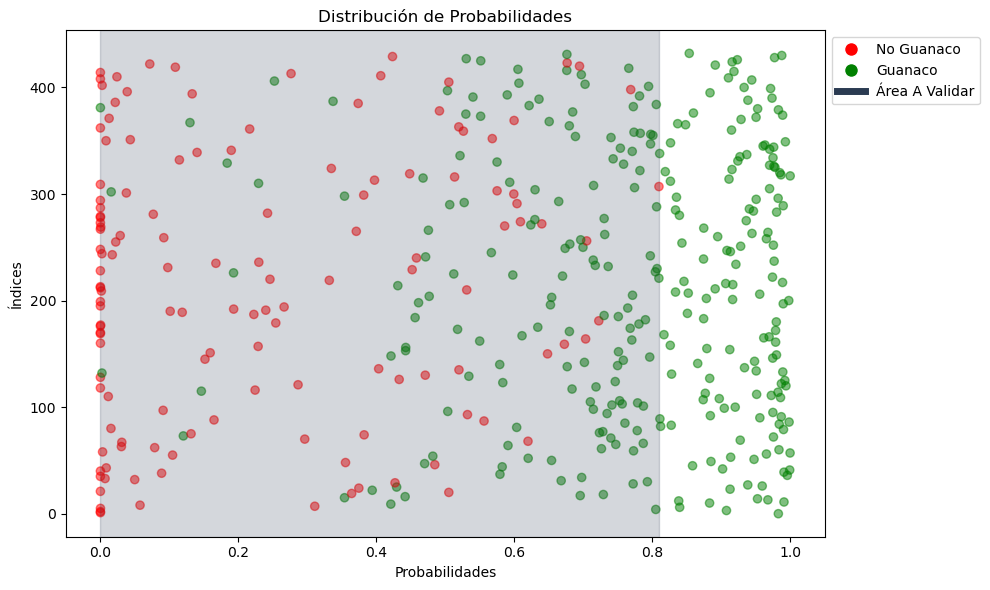

In [90]:
import matplotlib.pyplot as plt

# Crear índices para el eje x
x_values = list(range(len(y_probaVGG16)))

# Crear colores basados en y_test
color = ['red' if etiqueta == 0 else 'green' for etiqueta in y_test]

plt.figure(figsize=(10,6))
plt.scatter(y_probaVGG16, x_values, color=color, alpha=0.5)

# Sombrear el área 'A Validar'
plt.axvspan(umbral_inf_optimo, umbral_sup_optimo, alpha=0.2, color=colores[0], label='Área A Validar')

plt.title('Distribución de Probabilidades')
plt.xlabel('Probabilidades')
plt.ylabel('Índices')

# Añadir leyenda fuera del gráfico
from matplotlib.lines import Line2D
leyenda_elems = [Line2D([0], [0], marker='o', color='w', label='No Guanaco', markersize=10, markerfacecolor='red'),
                 Line2D([0], [0], marker='o', color='w', label='Guanaco', markersize=10, markerfacecolor='green'),
                Line2D([0], [0], marker='None', color=colores[0], label='Área A Validar', linewidth=5)]
plt.legend(handles=leyenda_elems, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

##### Tecnica de Lift: 
Se calcula como el cociente entre la proporción de positivos acumulados y la proporción de totales acumulados. Equivalente a comparar los positivos destacados por el modelo vs lo que cabria esperar si nos guiamos por el azar. 

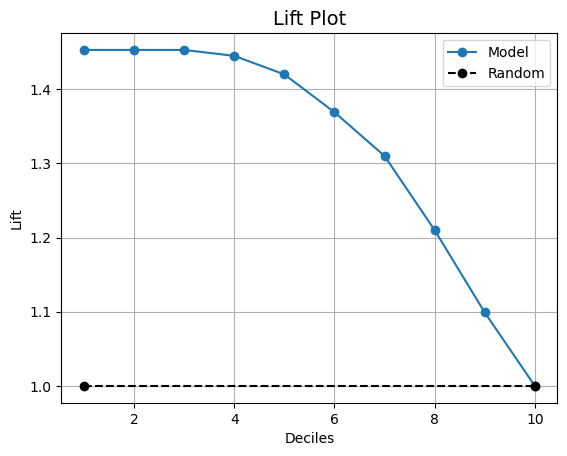

In [50]:
# Plot
kds.metrics.plot_lift(y_test, y_probaVGG16)